In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# Mỗi tệp đều có các trường dữ liệu giống nhau nên test trên 1 file trước tránh việc gộp file làm tốn tài nguyên
df = pd.read_csv('dataset/FPT.csv')

# Data Exploration

In [4]:
df.isna().sum()

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

In [10]:
df.shape

(97406, 11)

In [6]:
df.dtypes

Ticker            object
Date/Time         object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Open Interest      int64
dtype: object

In [7]:
df.nunique()

Ticker               1
Date/Time        97406
Open               802
High               800
Low                802
Close              802
Volume            6221
Open Interest        1
dtype: int64

In [36]:
df.head(10)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,fluctuation,time_diff,mins_diff,volume_diff,close_previous
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,NaN,NaT,NaN,NaN,NaN
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.08,0 days 00:01:00,1.0,-35220.0,30.89
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.07,0 days 00:01:00,1.0,930.0,30.81
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.00,0 days 00:01:00,1.0,1000.0,30.74
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.00,0 days 00:01:00,1.0,20380.0,30.74
5,FPT,2018-12-25 09:20:00,30.74,30.74,30.70,30.74,7140,0,0.00,0 days 00:01:00,1.0,-15360.0,30.74
6,FPT,2018-12-25 09:21:00,30.66,30.74,30.59,30.66,16480,0,-0.08,0 days 00:01:00,1.0,9340.0,30.74
7,FPT,2018-12-26 09:15:00,31.04,31.11,31.04,31.11,2650,0,0.38,0 days 23:54:00,1434.0,-13830.0,30.66
8,FPT,2018-12-26 09:16:00,31.19,31.19,31.19,31.19,500,0,0.08,0 days 00:01:00,1.0,-2150.0,31.11
9,FPT,2018-12-26 09:17:00,31.11,31.19,31.11,31.19,510,0,-0.08,0 days 00:01:00,1.0,10.0,31.19


In [38]:
df['fluctuation'] = df['Open'] - df['Close'].shift(1)

df['Date/Time'] = pd.to_datetime(df['Date/Time'].str.strip())
df['time_diff'] = df['Date/Time'] - df['Date/Time'].shift(1) 
df['mins_diff'] = df['time_diff'] / pd.Timedelta(minutes=1)

df['close_previous'] = 0 + df['Close'].shift(1)
df['volume_previous'] = 0 + df['Volume'].shift(1)

df2 = df.dropna()
df2.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,fluctuation,time_diff,mins_diff,volume_diff,close_previous,volume_previous
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,-0.08,0 days 00:01:00,1.0,-35220.0,30.89,35410.0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,-0.07,0 days 00:01:00,1.0,930.0,30.81,190.0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,0.00,0 days 00:01:00,1.0,1000.0,30.74,1120.0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,0.00,0 days 00:01:00,1.0,20380.0,30.74,2120.0
5,FPT,2018-12-25 09:20:00,30.74,30.74,30.70,30.74,7140,0,0.00,0 days 00:01:00,1.0,-15360.0,30.74,22500.0


In [10]:
df2['mins_diff'].describe()

count    97405.000000
mean        10.765885
std        162.399234
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      14069.000000
Name: mins_diff, dtype: float64

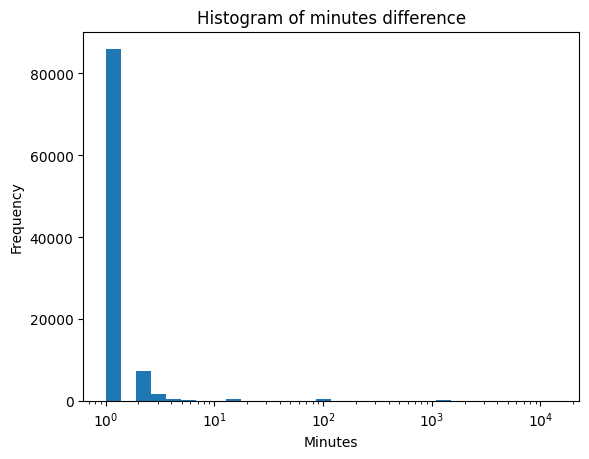

In [11]:
count, bins = np.histogram(df2['mins_diff'], 30)

logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(df2['mins_diff'], bins=logbins)
plt.xscale('log')
plt.title('Histogram of minutes difference')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

# Phân bố ko đồng đều

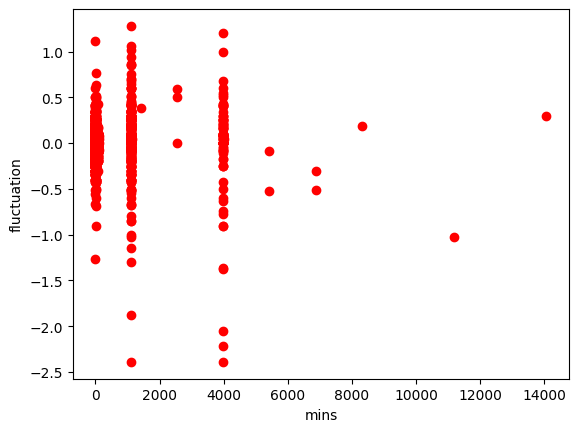

In [13]:
# scatter plot (2 ways)
# plt.scatter(df2['mins_diff'], df2['fluctuation'], color='green')

x_data = df2[['mins_diff']]
y_data = df2['fluctuation']

plt.plot(x_data, y_data, 'ro')
plt.xlabel('mins')
plt.ylabel('fluctuation')
plt.show()

In [39]:
mean = df2['mins_diff'].mean()
std = df2['mins_diff'].std()
print(mean, std)

df2['z_score'] = (df2['mins_diff'] - mean) / std
print(df2['z_score'].max(), df2['z_score'].min())

10.765884708177198 162.39923437744935
86.56588911384634 -0.06013504155739593


C:\Users\nthph\AppData\Local\Temp\ipykernel_7328\1363496509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z_score'] = (df2['mins_diff'] - mean) / std


In [40]:
df3 = df2.drop(columns=['Ticker', 'Open Interest', 'z_score', 'time_diff'])
df3.corr()

,Date/Time,Open,High,Low,Close,Volume,fluctuation,mins_diff,volume_diff,close_previous,volume_previous
Date/Time,1.000000,0.803795,0.803952,0.803619,0.803781,0.074143,0.001159,-0.008830,-0.000118,0.803782,0.074283
Open,0.803795,1.000000,0.999982,0.999980,0.999970,0.077959,0.004009,-0.009721,-0.000006,0.999962,0.077965
High,0.803952,0.999982,1.000000,0.999968,0.999982,0.078979,0.002446,-0.009494,0.000032,0.999957,0.078940
Low,0.803619,0.999980,0.999968,1.000000,0.999980,0.076865,0.002514,-0.009732,-0.000326,0.999955,0.077253
Close,0.803781,0.999970,0.999982,0.999980,1.000000,0.077983,0.001912,-0.009562,-0.000228,0.999950,0.078254
Volume,0.074143,0.077959,0.078979,0.076865,0.077983,1.000000,-0.040399,0.090380,0.597462,0.078313,0.286062
fluctuation,0.001159,0.004009,0.002446,0.002514,0.001912,-0.040399,1.000000,-0.009167,-0.035927,-0.004765,0.002531
mins_diff,-0.008830,-0.009721,-0.009494,-0.009732,-0.009562,0.090380,-0.009167,1.000000,-0.187036,-0.009640,0.313873
volume_diff,-0.000118,-0.000006,0.000032,-0.000326,-0.000228,0.597462,-0.035927,-0.187036,1.000000,0.000310,-0.597476
close_previous,0.803782,0.999962,0.999957,0.999955,0.999950,0.078313,-0.004765,-0.009640,0.000310,1.000000,0.077942


In [6]:
# remove outlier
df_no_outlier = df2[(df2['z_score'] <= 10)]
print(df_no_outlier.shape)
# origin_shape: 97405 

(97299, 12)


# Train Regression Model

In [9]:
le = LabelEncoder()
df2['Ticker'] = le.fit_transform(df2['Ticker'])

x = df2[['Open', 'High', 'Low', 'Close', 'Volume', 'mins_diff']]
y = df2['fluctuation']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

C:\Users\nthph\AppData\Local\Temp\ipykernel_3412\3886416884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Ticker'] = le.fit_transform(df2['Ticker'])


In [20]:
linear = LinearRegression()
L1 = Lasso()
L2 = Ridge()

linear.fit(x_train, y_train)
L1.fit(x_train, y_train)
L2.fit(x_train, y_train)

print(linear.score(x_test, y_test))
print(L1.score(x_test, y_test))
print(L2.score(x_test, y_test))

0.1063619704399561
-6.422954131646286e-05
0.01681640528293571


In [22]:
# Polynomial Regression

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# print(x_train.shape)
# print(x_train_poly.shape)
# print(x_test_poly.shape)

poly.fit(x_train_poly, y_train)

lin2 = LinearRegression()
lin2.fit(x_train_poly, y_train)
print(lin2.score(x_test_poly, y_test))

# degree=2 cao hơn mấy degree còn lại

0.12082072730592863
[[1.         0.34944108]
 [0.34944108 1.        ]]


#### Correlation between variables low => Regression model can't solve this effectively => Use Classification model

# Train Classification Model

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
# Convert target to object for classification model
df4 = df2.copy()
print(df4['fluctuation'].nunique())

df4['fluctuation'] = df4['fluctuation'].round(2)
df4['fluctuation'] = df4['fluctuation'].astype('str')

print(df4['fluctuation'].nunique())

181
113


In [61]:
x = df4[['mins_diff',  'volume_previous']]
y = df4['fluctuation']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [62]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test) 
# mins_diff: 0.652     
# volume_previous + mins_diff: 0.656 -> 0.655
# mins_diff + close_previous: 0.652 -> 0.66 -> 0.653
# mins_diff + close_previous + volume_previous: 0.654 -> 0.66 -> 0.654

C:\Users\nthph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6553051691391613

In [9]:
# Use GridSearchCV to choose the best model with their best parameter

model_params = {
    'Logistic': {
        'model': LogisticRegression(), 
        'params': {
            'C': [3,5,10]
            }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(), 
        'params': {
            'n_estimators': [5,10,20]
        }
    },
    'Bagging': {
        'model': BaggingClassifier(base_estimator=DecisionTreeClassifier(),max_samples=0.8, oob_score=True, random_state=0), 
        'params': {
            'n_estimators': [5,10,20]
        }
    },
    'K_Neighbors': {
        'model': KNeighborsClassifier(), 
        'params': {
            'n_neighbors': [3,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df_score)

C:\Users\nthph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\nthph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nthph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\

           model  best_score          best_params
0       Logistic    0.654350             {'C': 3}
1  Random_Forest    0.208634  {'n_estimators': 5}
2        Bagging    0.216868  {'n_estimators': 5}
3    K_Neighbors    0.538454  {'n_neighbors': 10}
